In [1]:
import pandas as pd, numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

data_path = ['..', 'data']

numeric = ["time", "umux", "helpOccurences", "spamCount"]
categorical = ["age", "gender", "education", "income", "web", "stores"]
categorical_labels = [
    ['18 - 27', '28 - 37', '38 - 47', '48 - 57', '58+'],
    ['Man', 'Woman'],
    ['Secondary education', 'High school diploma', 'Technical/community college',
     'Undergraduate degree', 'Graduate degree', 'Doctoral degree'],
    ['No income', '£0 - £9,999', '£10,000 - £19,999', '£20,000 - £29,999', '£30,000 - £39,999', 
       '£40,000 - £49,999','£50,000 - £74,999',
       '£75,000 - £100,000',  'More than £100,000'],
    ['For a significant part of the day', 'Few times a day',
       'Few times a week'],
    ['Daily', 'Several times a week', 'Once a week', 'Once a month',
       'Several times a month', 'Every few months', 'Never']
]
checkboxes = ["hotspotOptions"]
info = ["variant", "respondent"]
strings = ["clickability", "note"]
attentions = ["att1", "att2"]

# EDA - respondents

In [2]:
# load results
respondents = pd.read_csv(os.path.join(*data_path, 'respondents.csv'), index_col=0)

## Demographics

In [3]:
for column in categorical[:3]:
    print(respondents.groupby([column, 'variant']).size().unstack(), end='\n\n')

variant  interactive  non-interactive
age                                  
18 - 27           14               14
28 - 37           12               12
38 - 47            8                8
48 - 57            4                4
58+                2                2

variant  interactive  non-interactive
gender                               
Man               20               20
Woman             20               20

variant                      interactive  non-interactive
education                                                
Doctoral degree                      2.0              NaN
Graduate degree                     12.0             11.0
High school diploma                  3.0              6.0
Secondary education                  3.0              3.0
Technical/community college          4.0              7.0
Undergraduate degree                16.0             13.0



In [4]:
for column in categorical[3:]:
    print(respondents.groupby([column, 'variant']).size().unstack(), end='\n\n')

variant             interactive  non-interactive
income                                          
More than £100,000          NaN              2.0
No income                   2.0              1.0
£0 - £9,999                 5.0              4.0
£10,000 - £19,999           3.0             11.0
£20,000 - £29,999          13.0              7.0
£30,000 - £39,999           6.0             10.0
£40,000 - £49,999           6.0              3.0
£50,000 - £74,999           4.0              NaN
£75,000 - £100,000          1.0              2.0

variant                            interactive  non-interactive
web                                                            
Few times a day                           12.0             18.0
Few times a week                           NaN              1.0
For a significant part of the day         28.0             21.0

variant                interactive  non-interactive
stores                                             
Daily                         11.0 

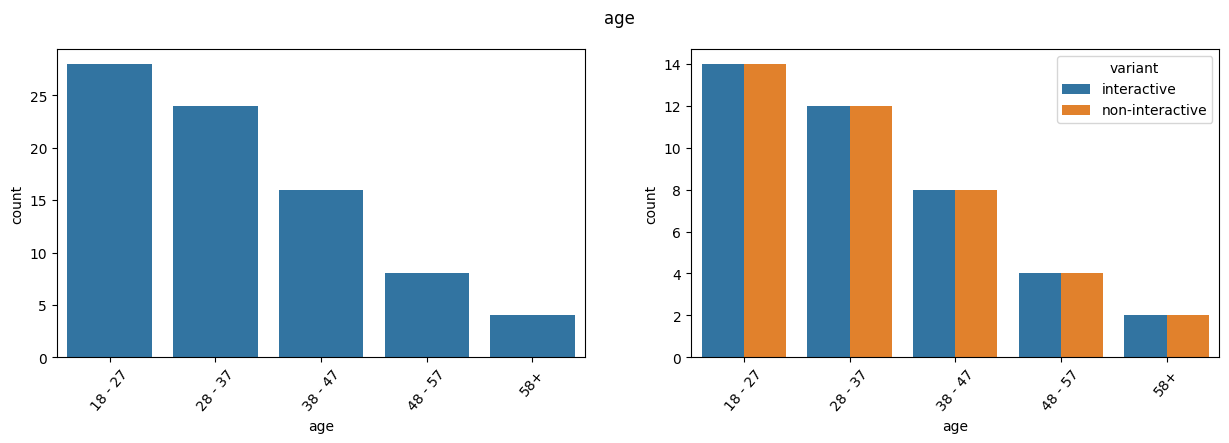

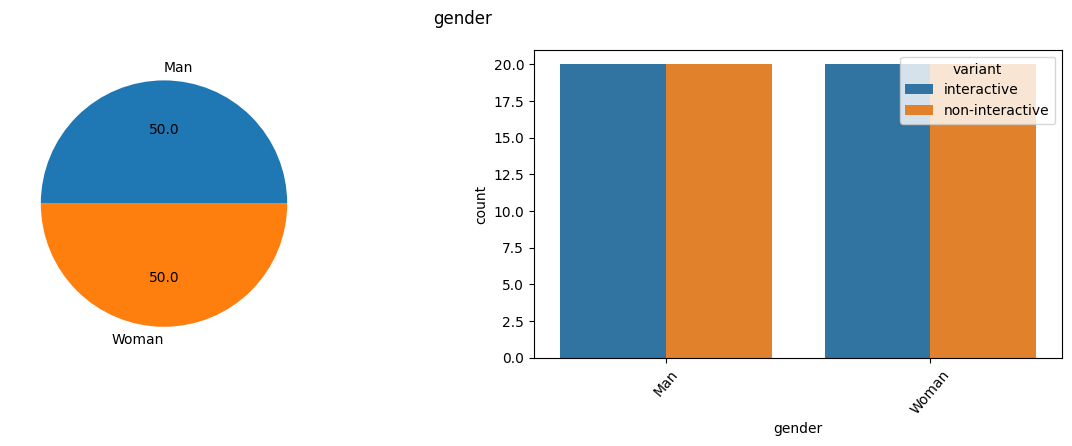

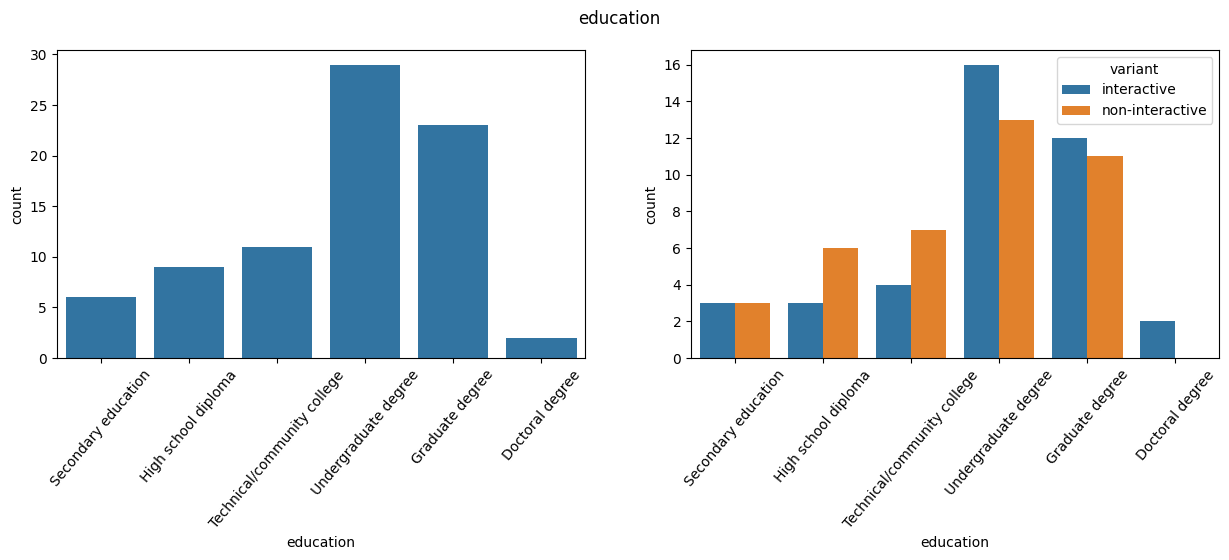

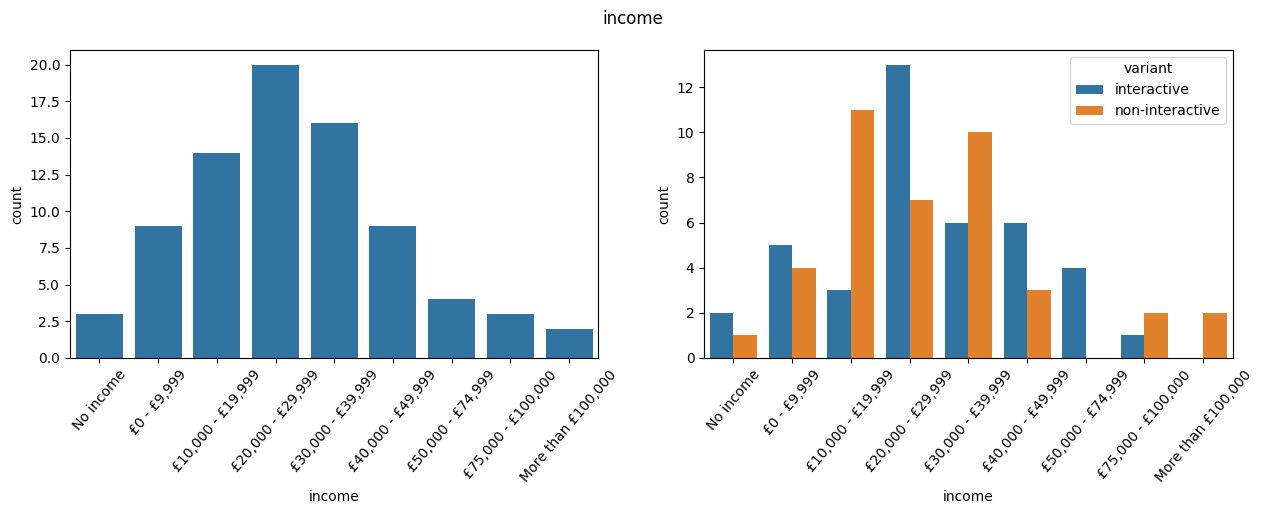

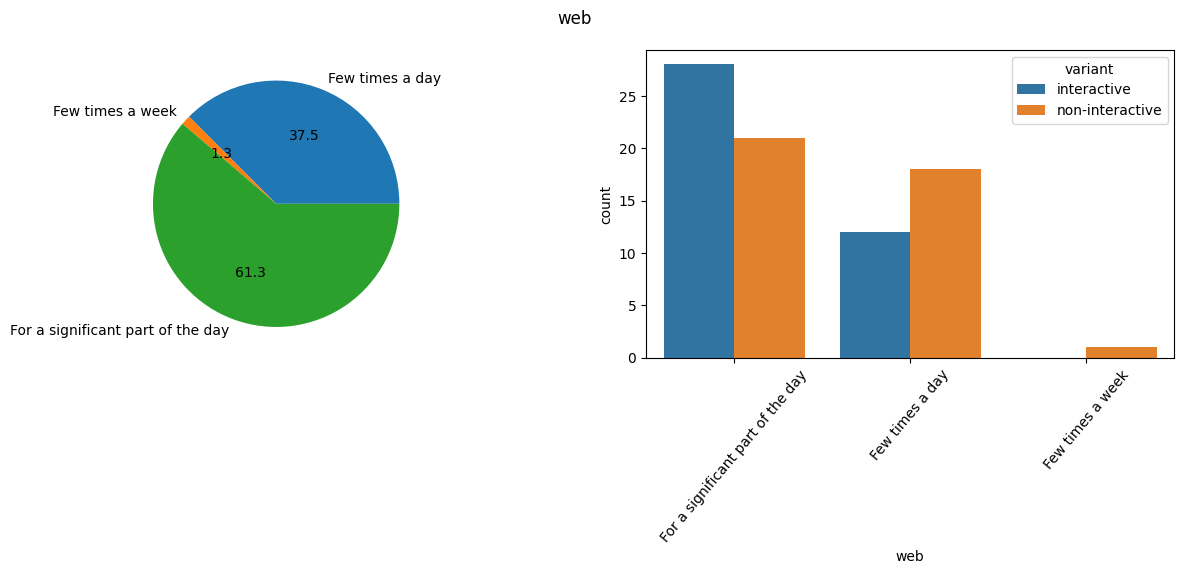

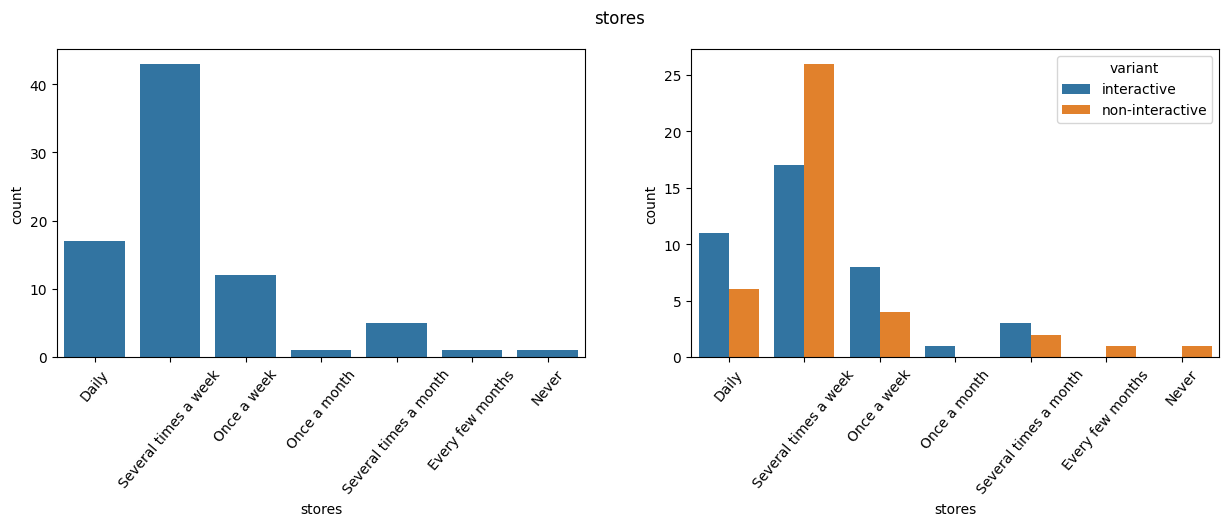

In [5]:
for index, column in enumerate(categorical):
    fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(15, 4))
    if(len(respondents[column].unique()) > 3):
        sns.countplot(data=respondents, x=column, ax=ax1, order=categorical_labels[index])
        ax1.tick_params(axis='x', rotation=50)
    else:
        respondents.groupby([column]).size().plot.pie(ax=ax1, autopct='%.1f')
    sns.countplot(data=respondents, x=column, hue="variant", ax=ax2, order=categorical_labels[index])
    ax2.tick_params(axis='x', rotation=50)
    fig.suptitle(column)

## Hotspot options

In [6]:
hotspotOptions = [x for y in list(map(lambda x: x.split(', '), respondents[
    respondents.variant=='non-interactive'
].hotspotOptions.values)) for x in y]
Counter(hotspotOptions)

Counter({'noticed': 31,
         'helped': 26,
         'used': 9,
         'none-above': 5,
         'distracted': 4,
         'sped-up': 1})

<Axes: >

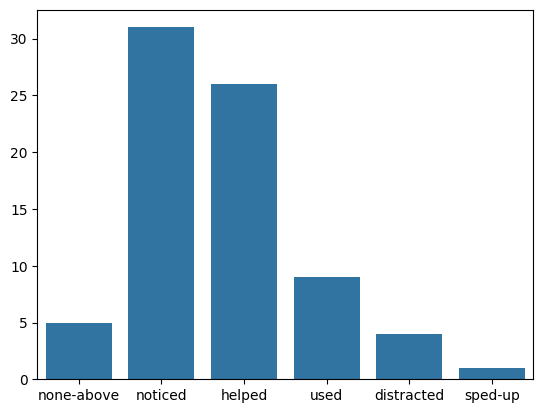

In [7]:
sns.barplot(dict(Counter(hotspotOptions)), order=['none-above', 'noticed', 'helped', 'used', 'distracted', 'sped-up'])

## Time, UMUX scores, help occurences and spam count

In [8]:
respondents[numeric[:2]].agg(['mean', 'median', 'std', 'min', 'max', 'sum']).transpose()

,mean,median,std,min,max,sum
time,8.675250,8.275,3.054325,4.40,21.35,694.02
umux,55.520375,58.330,24.661123,4.17,100.00,4441.63


In [9]:
respondents[numeric[:2]].quantile([0.1, 0.25, 0.5, 0.75, 0.95])

,time,umux
0.10,5.3420,24.583
0.25,7.0350,33.330
0.50,8.2750,58.330
0.75,9.3200,75.000
0.95,14.6085,95.830


In [10]:
respondents[numeric[:2] + ["variant"]].groupby('variant').agg(['mean', 'median', 'std', 'min', 'max', 'sum'])

time                                            umux  \
                    mean median       std   min    max     sum      mean   
variant                                                                    
interactive      8.30275  7.985  2.490048  4.53  15.62  332.11  58.22825   
non-interactive  9.04775  8.430  3.523073  4.40  21.35  361.91  52.81250   

                                                          
                median        std    min    max      sum  
variant                                                   
interactive      58.33  23.934697  16.67  100.0  2329.13  
non-interactive  56.25  25.377652   4.17  100.0  2112.50

In [11]:
respondents[numeric[:2] + ["variant"]].groupby('variant').quantile([0.1, 0.25, 0.5, 0.75, 0.95])

time     umux
variant                               
interactive     0.10   5.3770  32.9140
                0.25   6.8650  39.5850
                0.50   7.9850  58.3300
                0.75   9.0075  76.0425
                0.95  12.3950  95.8300
non-interactive 0.10   5.2560  19.9970
                0.25   7.3875  32.2900
                0.50   8.4300  56.2500
                0.75   9.5125  71.8725
                0.95  14.8050  91.6700

In [12]:
respondents[numeric[2:] + ["variant"]].groupby('variant').agg(['mean', 'median', 'std', 'min', 'max', 'sum'])

helpOccurences                                    spamCount  \
                          mean median       std  min   max    sum      mean   
variant                                                                       
interactive                NaN    NaN       NaN  NaN   NaN    0.0       NaN   
non-interactive            5.0    5.0  2.601775  0.0  11.0  200.0     1.325   

                                                  
                median       std  min  max   sum  
variant                                           
interactive        NaN       NaN  NaN  NaN   0.0  
non-interactive    1.0  1.095152  0.0  5.0  53.0

In [13]:
respondents[numeric[2:] + ["variant"]].groupby('variant').quantile([0.1, 0.25, 0.5, 0.75, 0.95])

helpOccurences  spamCount
variant                                        
interactive     0.10             NaN        NaN
                0.25             NaN        NaN
                0.50             NaN        NaN
                0.75             NaN        NaN
                0.95             NaN        NaN
non-interactive 0.10            1.90       0.00
                0.25            3.00       0.75
                0.50            5.00       1.00
                0.75            7.00       2.00
                0.95            9.05       3.00

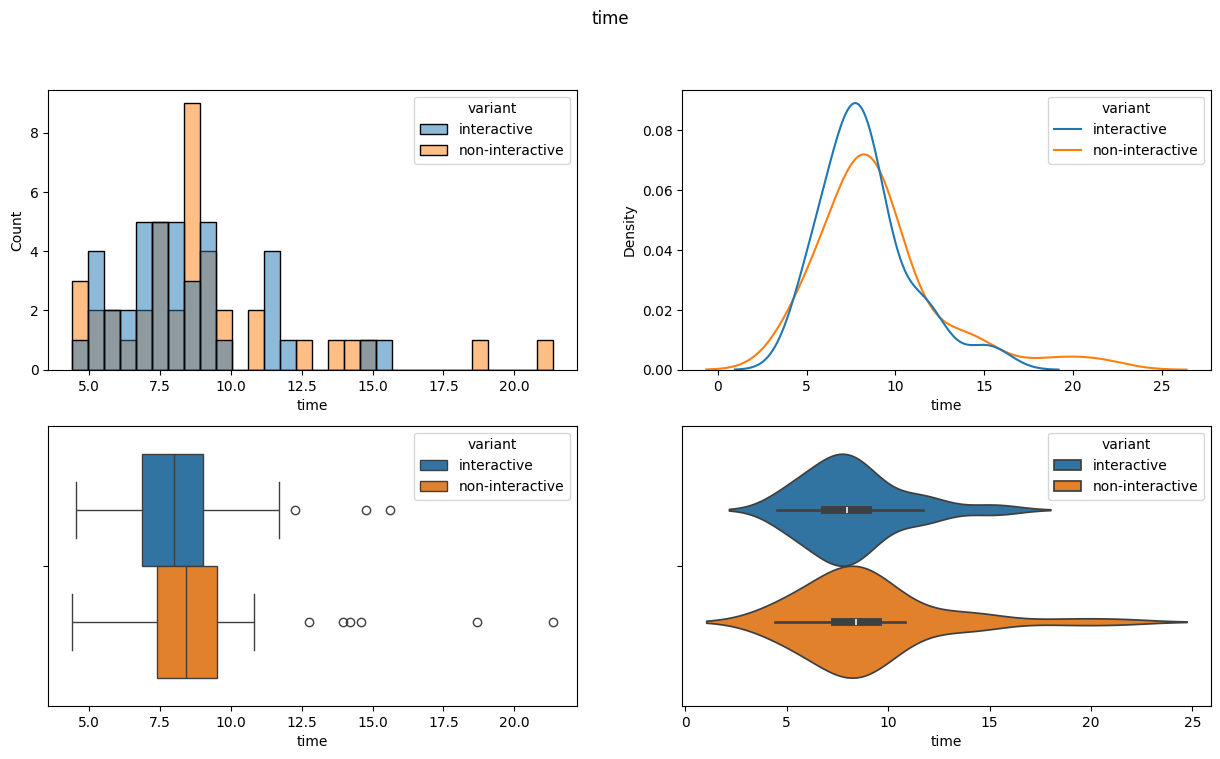

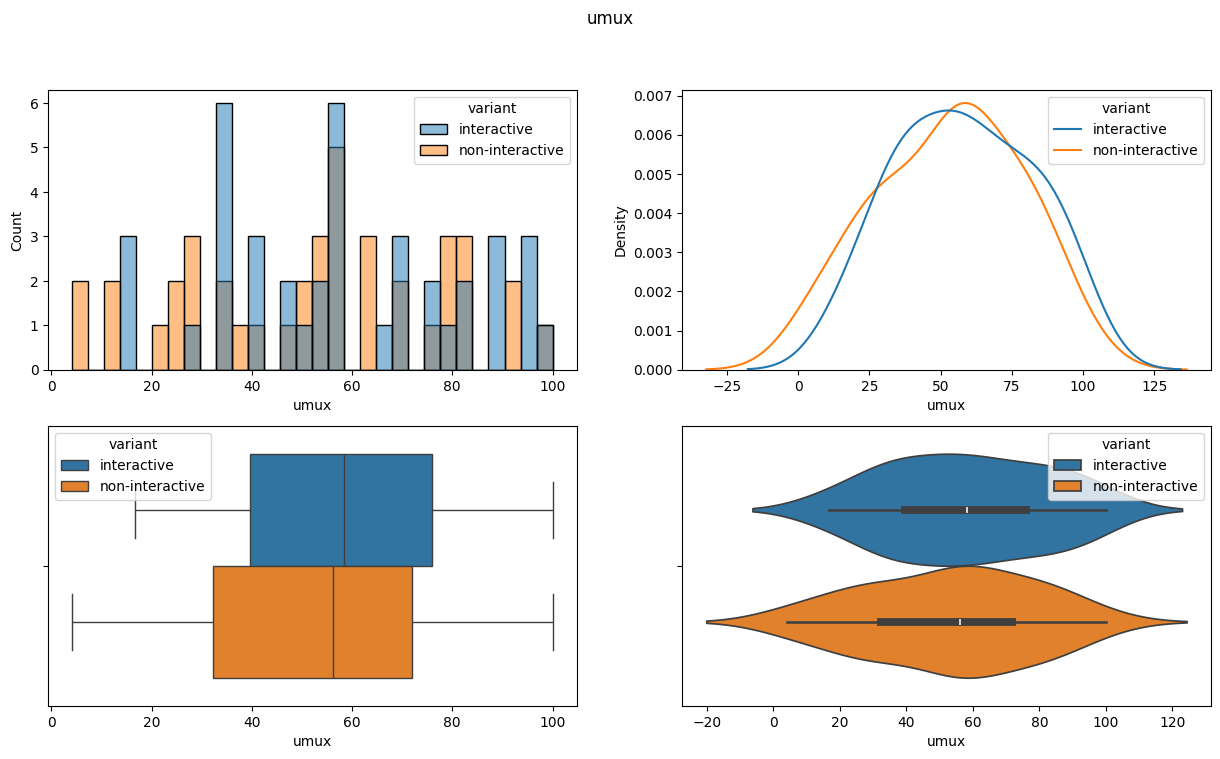

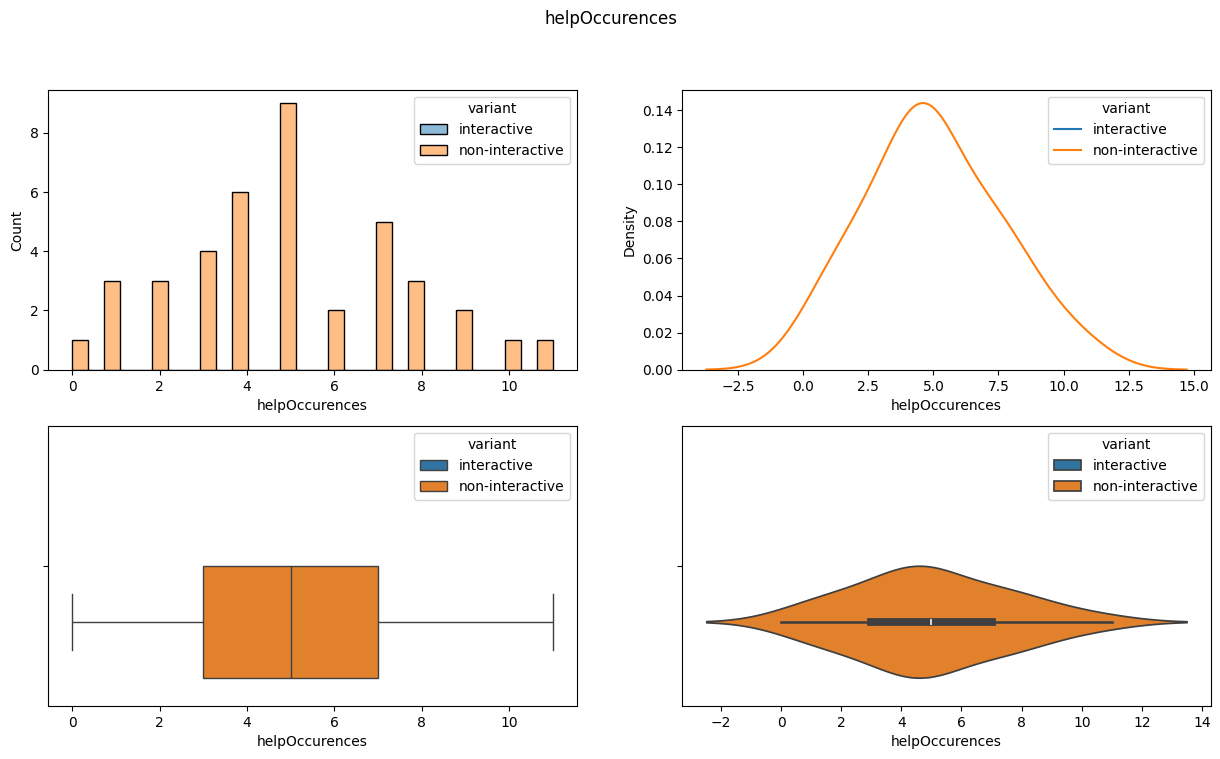

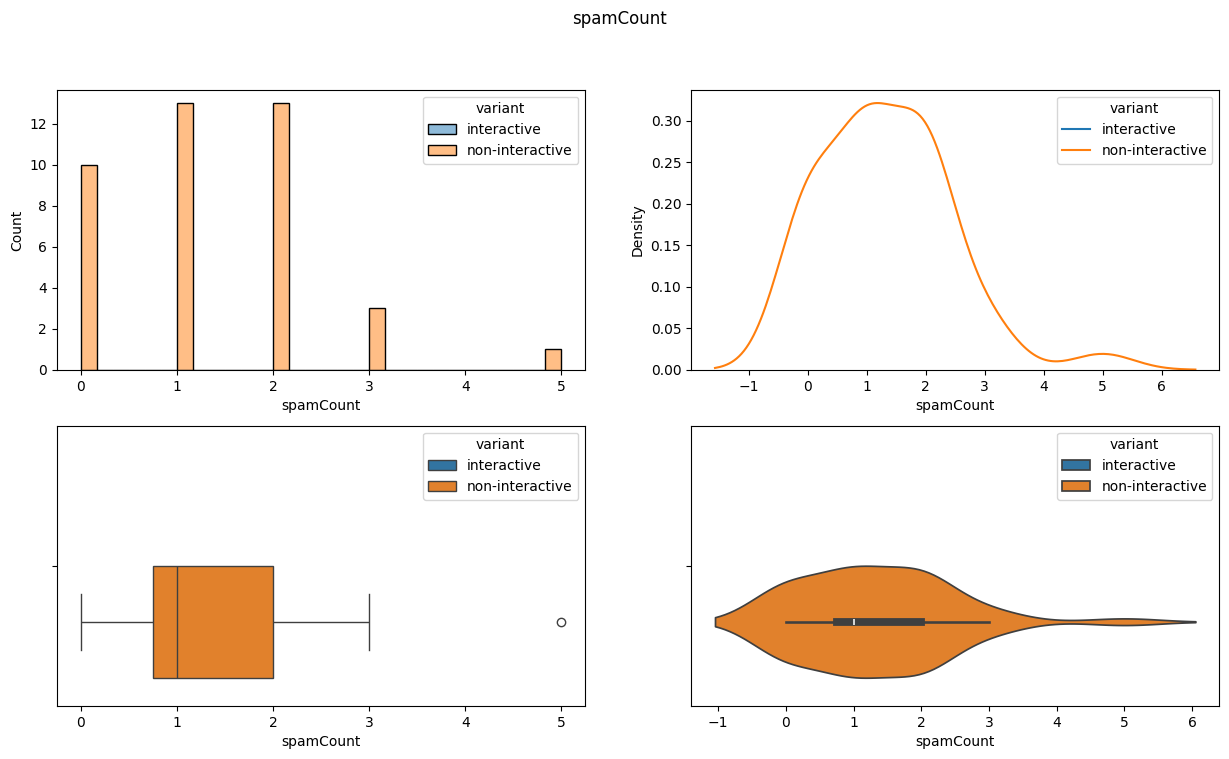

In [14]:
for column in numeric:
    fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(ncols=2, nrows=2, figsize=(15, 8))
    sns.histplot(data=respondents, x=column, bins=30, hue='variant', ax=ax1)
    sns.kdeplot(data=respondents, x=column, hue='variant',  ax=ax2)
    sns.boxplot(data=respondents, x=column, hue='variant', ax=ax3)
    sns.violinplot(data=respondents, x=column, hue='variant', ax=ax4)
    fig.suptitle(column)

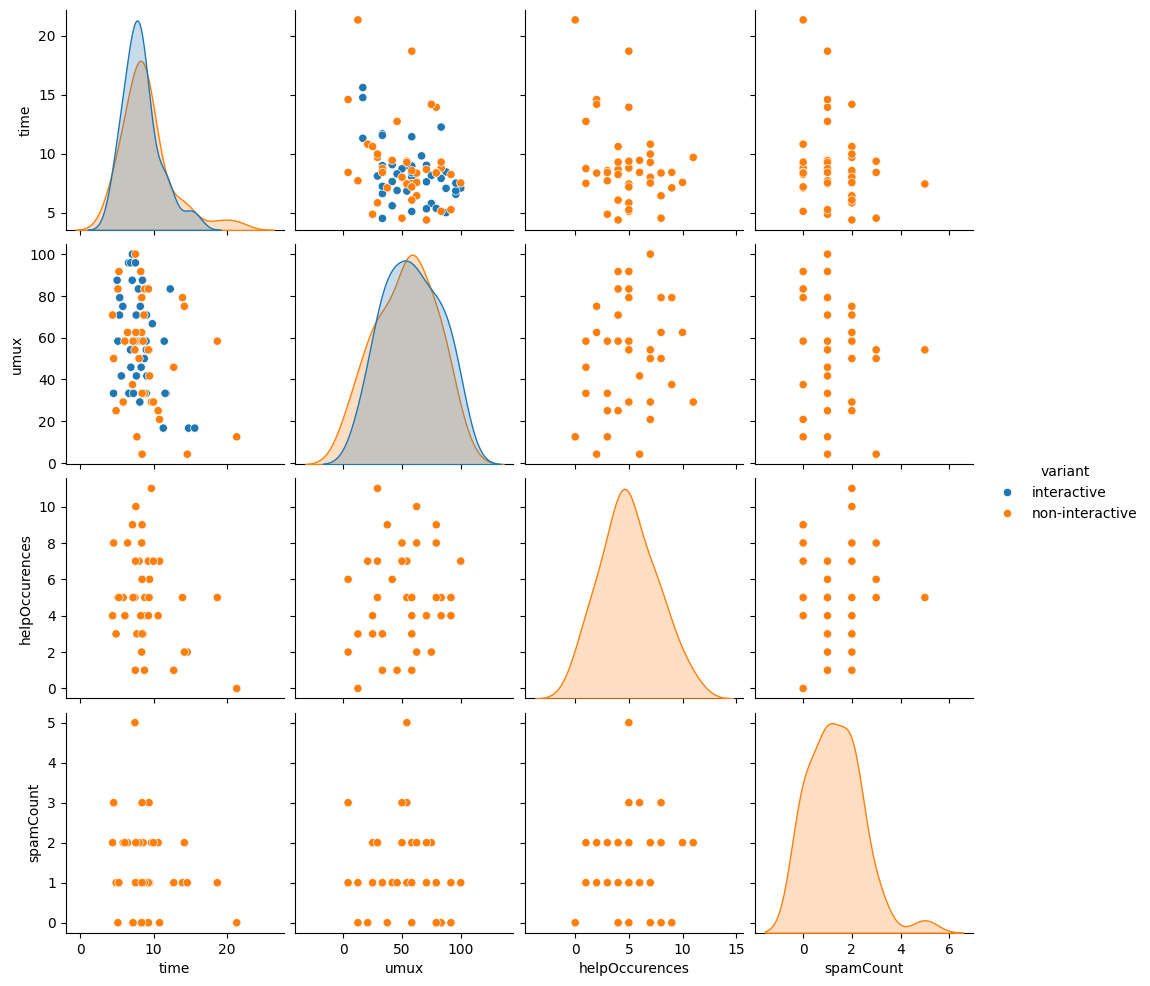

In [15]:
sns.pairplot(data=respondents[numeric + ["variant"]], hue="variant")

In [16]:
for column in ['helpOccurences', 'spamCount']:
    print(respondents.groupby([column, 'variant']).size().unstack(), end='\n\n')

variant         non-interactive
helpOccurences                 
0.0                           1
1.0                           3
2.0                           3
3.0                           4
4.0                           6
5.0                           9
6.0                           2
7.0                           5
8.0                           3
9.0                           2
10.0                          1
11.0                          1

variant    non-interactive
spamCount                 
0.0                     10
1.0                     13
2.0                     13
3.0                      3
5.0                      1



## Attention checks

In [17]:
for column in attentions:
    print(respondents.groupby([column, 'variant']).size().unstack(), end='\n\n')

variant  interactive  non-interactive
att1                                 
Salad             40               40

variant  interactive  non-interactive
att2                                 
12               NaN              1.0
30              40.0             39.0



## Notes

### Clickability

In [18]:
for index, row in respondents.iterrows():
    note = row.clickability
    print(str(index) + ('  I: ' if row.variant=='interactive' else ' N: '), note)

0  I:  I think so, just need a few prompts like when adding to basket, it should say its been added to basket.
1  I:  Yes
2  I:  Yes.
3  I:  Nope. It did not allow me to buy and confirm. It also did not allow me to check the return policy. 
4  I:  Yep it did.
5  I:  some items I was not able to click on
6  I:  Yes
8  I:  yes! but i dint realise i actually need to copy the order number thought it would be auto populated 
9  I:  No, I thought I'd be able to click the returns page on the last task 
10  I:  Yes
12  I:  no, returns info wasn't clear at bottom of site, not clickable 
13  I:  yes
14  I:  Yes, it did.
15  I:  Yes
16  I:  Yes
17  I:  Yes everything worked well
19  I:  Yes
21  I:  Yes it did
22  I:  Yes it did
23  I:  No - certain links were not active which restricted how i used the site
24  I:  I could click on everything I expected to be clickable but it still didn't help me complete the tasks
25  I:  Yes, it did
26  I:  Not totally, I expected things like shipping to be clic

### Note

In [19]:
for index, row in respondents.iterrows():
    note = row.note
    if (not pd.isnull(note) and note not in [
        'Did not answer', 'No', 'No, thanks', 'Nope, Thanks!', 'no', 'no.', 'nope', 'No.', 'N/A.'
    ]):
        print(('I: ' if row.variant=='interactive' else 'N: '), note)

I:  Accidentally mis-read the question 2 after the blain black t-shirt, meant to be I found it easy to navigate!
I:  Only having colour images instead of text or tooltips for filtering on colours makes it less accessible for some. Also, wishlists should not have been allowed before account creation / log in.
I:  I expected something to pop up when I added the item to cart, but otherwise the website worked as I'd expect it to.
I:  wasn't clear on how to pay for the item
I:  I think I covered everything in my previous messages. It seems like extra steps are being added for no reason
I:  When i looked at my orders, i expected that when i clicked on the t-shirt a new page would appear giving my information about that order, and that is where i expected to be able to return it
I:  I found the return process to be a bit clumsy, I don't like how I had to copy and paste the order number in. The ecom experiences I've had allowed me to select from recent orders instead
I:  This UXtweak site is p

## Heatmap

<Axes: >

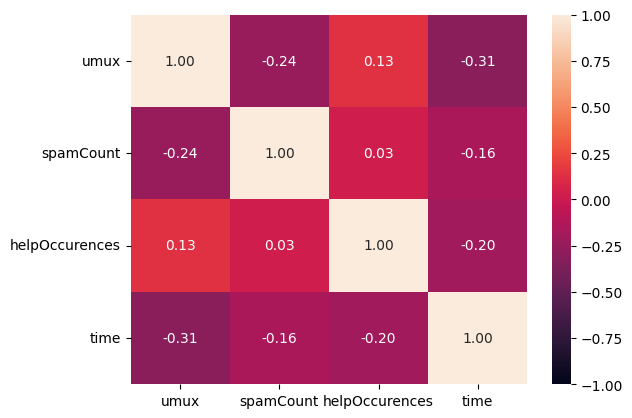

In [35]:
sns.heatmap(respondents[['umux', 'spamCount', 'helpOccurences', 'time']].corr(method="spearman"), annot=True, fmt=".2f", vmin=-1, vmax=1)